In [2]:

from glob import glob
import os
from PIL import Image
import staintools
import matplotlib.pyplot as plt
import warnings
import cv2
import numpy as np
import shutil
from tqdm import tqdm
from collections import Counter
data_path='../../data/normalization_type/Notstandard/'
save_path='../../data/normalization_type/standard/'

In [3]:
class_list=glob('../../data/NIA/**/')
for i in tqdm(range(len(class_list))):
    file_list=glob(class_list[i]+'*.jpeg')
    if len(file_list)<700:
        file_list=np.random.choice(np.array(file_list), 200, replace=False)
    else:
        file_list=np.random.choice(np.array(file_list), 700, replace=False)
    for j in range(len(file_list)):
        shutil.copy(file_list[j],data_path+os.path.basename(file_list[j]))

100%|██████████| 9/9 [06:30<00:00, 43.41s/it]


In [3]:
data_list=glob(data_path+'/*.jpeg')
target = staintools.read_image('../../data/normalization_type/NIA6_R_BRID_BRCA-SS-00234-S-TP-02_37_38.jpeg')
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target)
for j in tqdm(range(len(data_list))):
    to_transform = staintools.read_image(data_list[j])
    warnings.simplefilter('ignore')
    transformed_2 = normalizer.transform(to_transform)
    transformed_2=cv2.cvtColor(transformed_2, cv2.COLOR_RGB2BGR)
    cv2.imwrite(save_path+os.path.basename(data_list[j]), transformed_2)


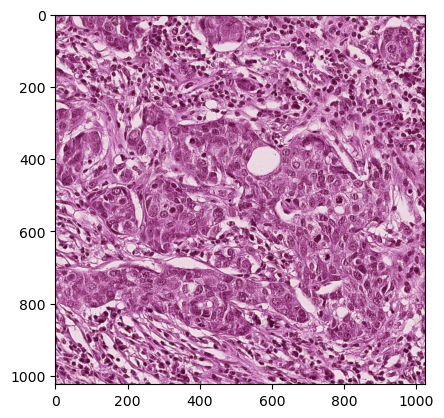

In [8]:
j=9
to_transform = staintools.read_image(data_list[j])
warnings.simplefilter('ignore')
transformed_2 = normalizer.transform(to_transform)
transformed_2=cv2.cvtColor(transformed_2, cv2.COLOR_RGB2BGR)
plt.imshow(transformed_2)

In [ ]:
a_data_list=glob(data_path+'/*.jpeg')
b_data_list=glob(save_path+'/*.jpeg')
data_list=[]
for i in range(len(a_data_list)):
    data_list.append(os.path.basename(a_data_list[i]))
for i in range(len(b_data_list)):
    data_list.append(os.path.basename(b_data_list[i]))
counter = Counter(data_list)
unique_values = [item for item, count in counter.items() if count == 1]

In [ ]:
for i in range(len(unique_values)):
    shutil.move(data_path+unique_values[i], '../../data/normalization_type/test/'+unique_values[i])

In [2]:

def calculate_histogram(image_path):
    # 이미지를 읽어옵니다.
    image = cv2.imread(image_path)
    
    # 이미지를 BGR에서 RGB로 변환합니다.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 각 채널에 대해 히스토그램을 계산합니다.
    hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])
    
    # 히스토그램을 하나의 벡터로 결합합니다.
    hist = np.concatenate((hist_r, hist_g, hist_b))
    
    # 히스토그램을 정규화합니다.
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

def compare_histograms(hist1, hist2):
    # 두 히스토그램 간의 유사도를 비교합니다.
    score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return score

# 이미지 경로
class_list = ['BRNT', 'BRLC', 'BRIL', 'BRID', 'BRDC']
image_path1 = '../../data/NIA/NIA6_R_STNT_STOP-SS-00097-S-TP-01_29_11.jpeg'
hist1 = calculate_histogram(image_path1)
for j in range(len(class_list)):    
    data_list=glob('../../data/NIA/'+class_list[j]+'/*.jpeg')
    for i in tqdm(range(len(data_list))):
        image_path2 = data_list[i]
        hist2 = calculate_histogram(image_path2)
        similarity_score = compare_histograms(hist1, hist2)
        if(similarity_score>0.9):
            shutil.copy(image_path2, save_path+os.path.basename(image_path2))

 11%|█         | 79450/739552 [29:50<4:07:56, 44.37it/s] 


KeyboardInterrupt: 

In [36]:
a_data_list=glob(data_path+'/*.jpeg')
b_data_list=[f.replace('/Notstandard', '/Notstandard_gan') for f in a_data_list]
save_path='../../data/normalization_type/Notstandard_r/'
for i in tqdm(range(len(a_data_list))):
    image=np.array(Image.open(a_data_list[i]))
    gan_image=np.array(Image.open(b_data_list[i]))
    index=np.where(image[...,1]>200)
    gan_image[index]=image[index]
    Image.fromarray(gan_image).save(save_path+os.path.basename(a_data_list[i]))

100%|██████████| 4478/4478 [04:08<00:00, 18.02it/s]
